In [6]:
import os
import sys
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = {'eps', 'retina'}
from modulation.modulation import QAMModem

ERROR:root:supported formats are: 'jpeg','svg','pdf','jpg','png','png2x','retina' not 'eps'


In [2]:
modem=QAMModem(256)

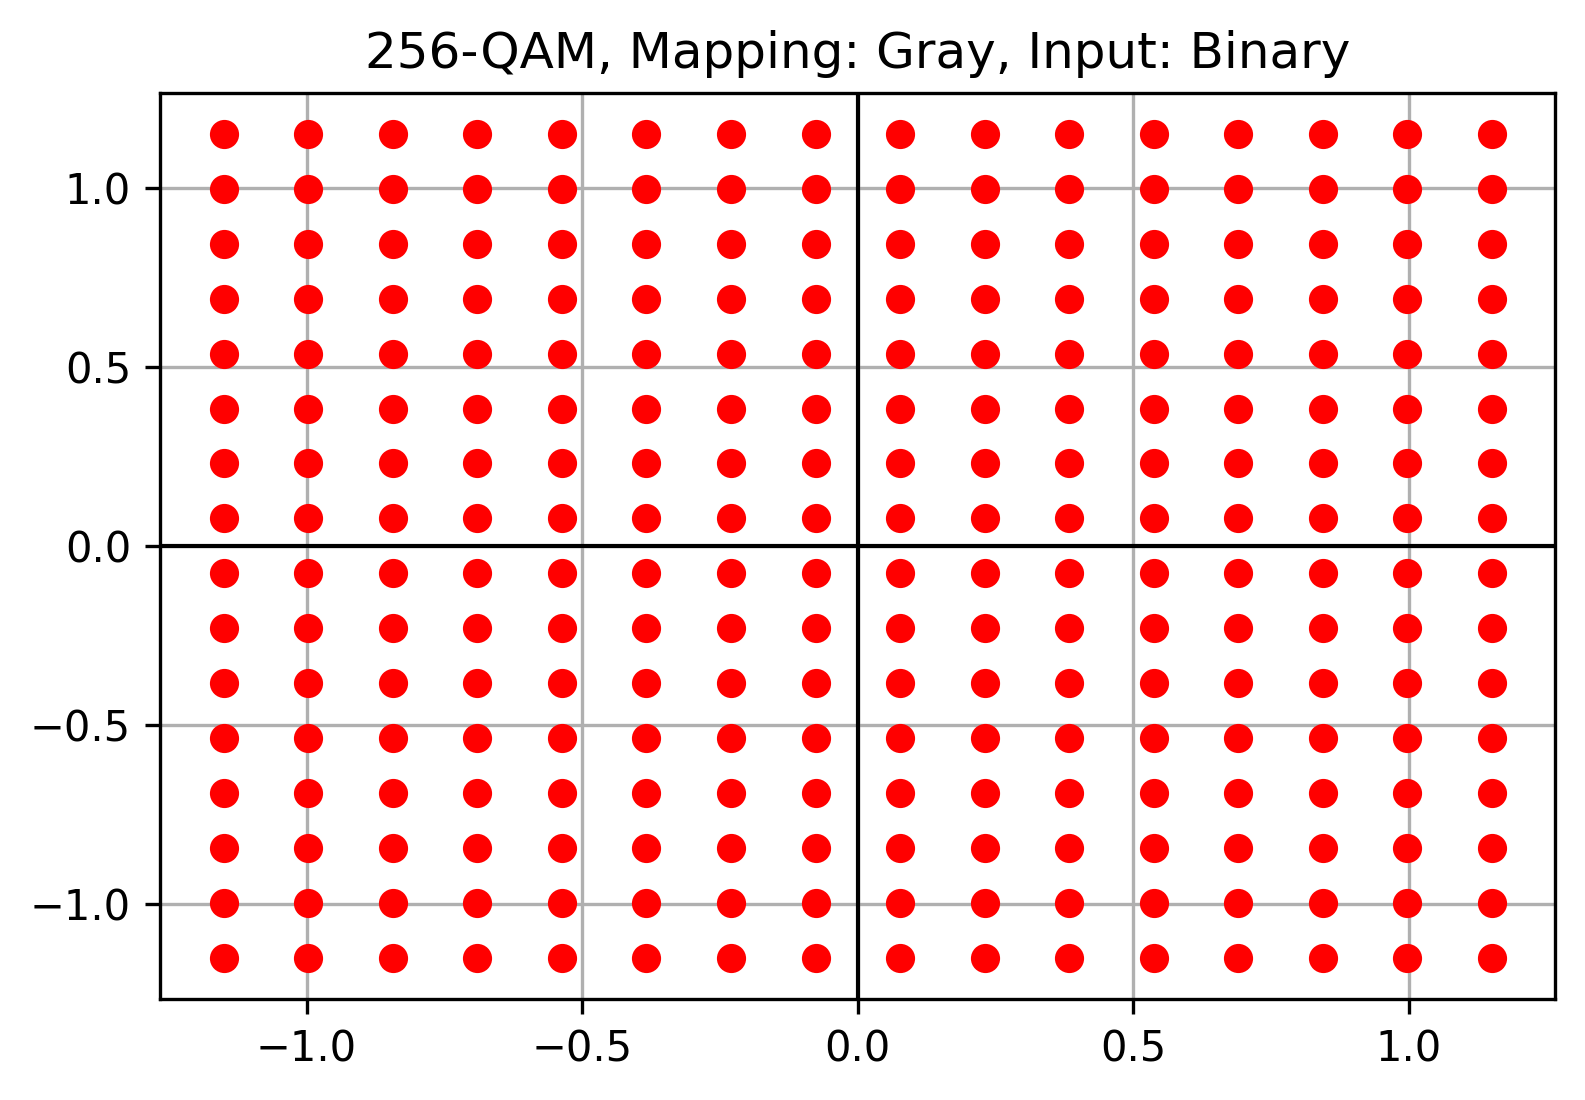

In [3]:
modem.plot_const()